In [2]:
%matplotlib inline
import numpy as np
from cluster import *
from IPython.core.display import Image

**Load names for the morfological parameters generated in [step 02](02 Morfological parameters Extraction.ipynb)**

In [3]:
img = np.load('features.npy')

**Create a $N-Dimension$ Array, to store the morfological features**

In [4]:
imagegroup = img2array(img)

**Perform a $K-means$ clustering to generate a landfrom map**

Initializing clusters along diagonal of N-dimensional bounding box.


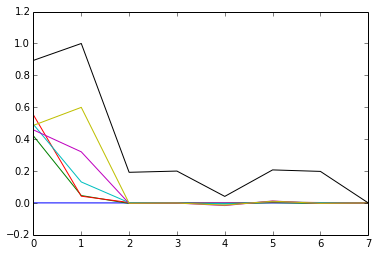

In [5]:
k = 7
cluster="cluster7dtm"
classifier = getKmeans(imagegroup=imagegroup, k=k)
spectralPlot(classifier[1])

**Write the results back t the GRASS database**

In [6]:
writeGarray(m=classifier[0], mapname=cluster)

newmap cluster7dtm written to GRASS MAPSET


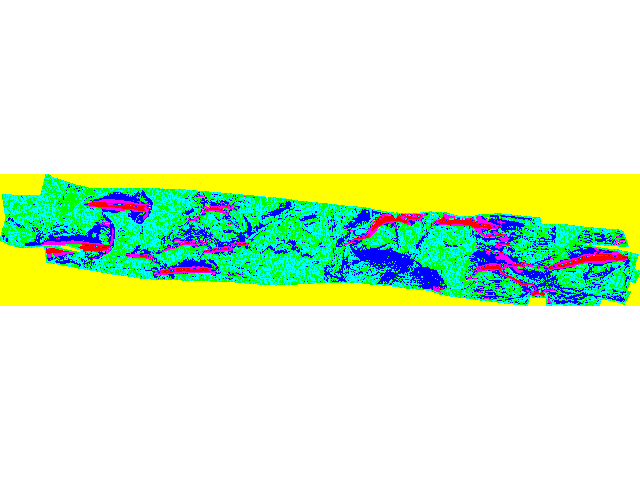

In [7]:
layer=cluster
!d.mon start=cairo --q output=TMP/{layer}.png --overwrite
!d.rast map={layer} --q
!d.mon stop=cairo --q
Image('TMP/'+layer+'.png')